<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/4.3%20%20%E4%B8%8B%E6%96%99%E9%97%AE%E9%A2%98%20(%E9%92%A2%E7%AE%A1%E5%88%87%E5%89%B2)%20%E3%80%90%20%E8%A6%81%E6%B1%82%20%E5%86%B3%E7%AD%96%E5%8F%82%E6%95%B0%20%E4%B8%BA%E6%95%B4%E6%95%B0%E3%80%91%E3%80%94%20pulp%20%E6%88%96%20scipy.optimize.linprog%20%E6%B1%82%E8%A7%A3%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%20%26%26%20scipy.optimize.minimize%20%E6%B1%82%E8%A7%A3%E9%9D%9E%E7%BA%BF%E6%80%A7%E8%A7%84%E5%88%92%E3%80%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

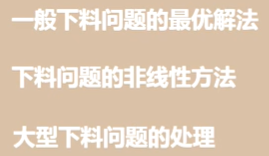

## 例 1  线性规划

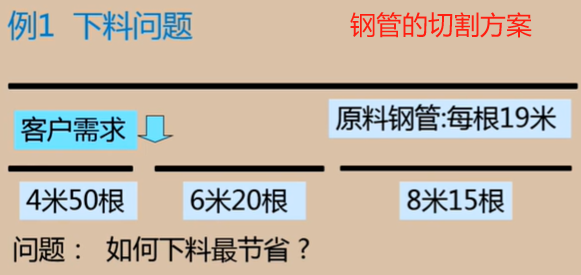

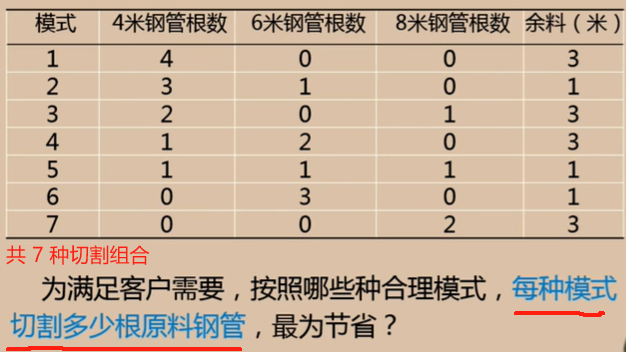

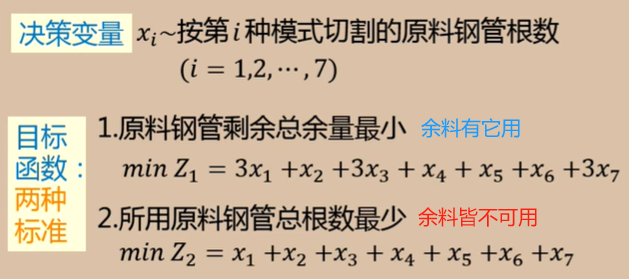

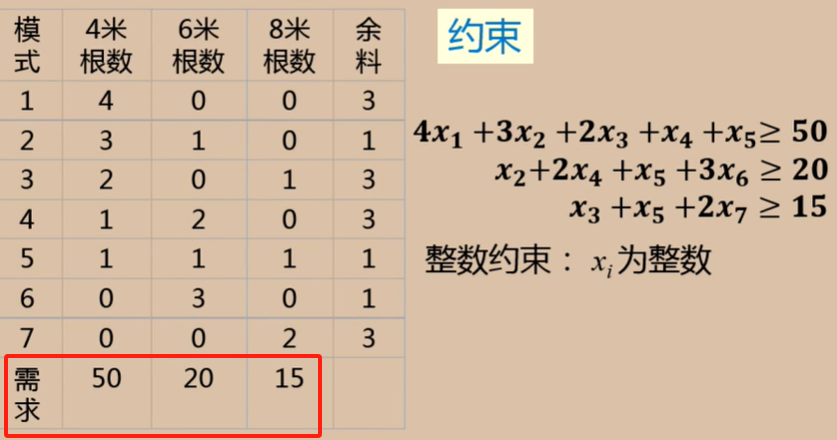

### 用 pulp 库求解

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.7 MB/s eta 0:00:00


In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *

prob = LpProblem("用 PuLP 求解线性规划问题", LpMinimize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("x1", 0, None, LpInteger) # 要求为整数 , LpInteger
x2 = LpVariable("x2", 0, None, LpInteger)
x3 = LpVariable("x3", 0, None, LpInteger)
x4 = LpVariable("x4", 0, None, LpInteger)
x5 = LpVariable("x5", 0, None, LpInteger)
x6 = LpVariable("x6", 0, None, LpInteger)
x7 = LpVariable("x7", 0, None, LpInteger)

# 增加 目标函数
prob += 3 * x1 + x2 + 3 * x3 + x4 + x5 + x6 + 3 * x7  # 原料钢管剩余量最小 余料有用

# 添加约束
prob += 4 * x1 + 3 * x2 + 2 * x3 + x4 + x5 >= 50
prob += x2 + 2 * x4 + x5 + 3 * x6 >= 20
prob += x3 + x5 + 2 * x7 >= 15

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

s = 0
# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)
    s += v.varValue

#
print("目标最小值 = ", value(prob.objective))  # 余料的米数 刚好也是 27
print("切割根数：", s)

求解状态: Optimal
x1 = 0.0
x2 = 12.0
x3 = 0.0
x4 = 0.0
x5 = 15.0
x6 = 0.0
x7 = 0.0
目标最小值 =  27.0
切割根数： 27.0


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1423: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
# https://coin-or.github.io/pulp/main/index.html

# !pip install pulp

from pulp import *

prob = LpProblem("用 PuLP 求解线性规划问题", LpMinimize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("x1", 0, None, LpInteger) # 要求为整数 , LpInteger
x2 = LpVariable("x2", 0, None, LpInteger)
x3 = LpVariable("x3", 0, None, LpInteger)
x4 = LpVariable("x4", 0, None, LpInteger)
x5 = LpVariable("x5", 0, None, LpInteger)
x6 = LpVariable("x6", 0, None, LpInteger)
x7 = LpVariable("x7", 0, None, LpInteger)

# 增加 目标函数
prob += x1 + x2 + x3 + x4 + x5 + x6 + x7  # 所用原料钢管总根数最少 余料无用

# 添加约束
prob += 4 * x1 + 3 * x2 + 2 * x3 + x4 + x5 >= 50
prob += x2 + 2 * x4 + x5 + 3 * x6 >= 20
prob += x3 + x5 + 2 * x7 >= 15

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])


# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)
    s += v.varValue

#
print("目标最小值 = ", value(prob.objective)) # 切割根数

求解状态: Optimal
x1 = 0.0
x2 = 15.0
x3 = 0.0
x4 = 0.0
x5 = 5.0
x6 = 0.0
x7 = 5.0
目标最小值 =  25.0


###  用 scipy.optimize.linprog  求解

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

# 原料钢管剩余量最小 余料有用
c = [3, 1, 3, 1, 1, 1, 3] # 目标函数的参数系数 最小化
A = [[-4, -3, -2, -1, -1, 0, 0],
    [0, -1, 0, -2, -1, -3, 0],
    [0, 0, -1, 0, -1, 0, -2]]  #   # 约束中 等式或不等式 的参数系数
b = [-50, -20, -15]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*7, integrality=1) # integrality=1 参数为整数
print("目标的最小值：", res.fun)  # 默认返回最小值 余料的米数
print("最优参数 x =", res.x)
print("是否优化成功：", res.message)
print("总根数：", sum(res.x))

目标的最小值： 27.0
最优参数 x = [ 0. 12.  0.  0. 15.  0.  0.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)
总根数： 27.0


In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog

from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

# 所用原料钢管总根数最少 余料无用
c = [1, 1, 1, 1, 1, 1, 1] # 目标函数的参数系数 最小化
A = [[-4, -3, -2, -1, -1, 0, 0],
    [0, -1, 0, -2, -1, -3, 0],
    [0, 0, -1, 0, -1, 0, -2]]  #   # 约束中 等式或不等式 的参数系数
b = [-50, -20, -15]
xi_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*7, integrality=1) # integrality=1 参数为整数
print("目标的最小值：", res.fun)  # 默认返回最小值 总根数
print("最优参数 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： 25.0
最优参数 x = [ 0. 15.  0.  0.  5.  0.  5.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


## 例 2 非线性规划  增加需求，同时限制模式数量

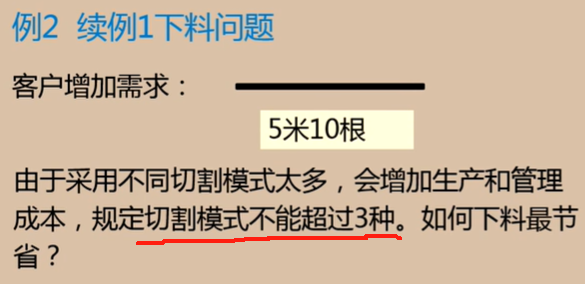

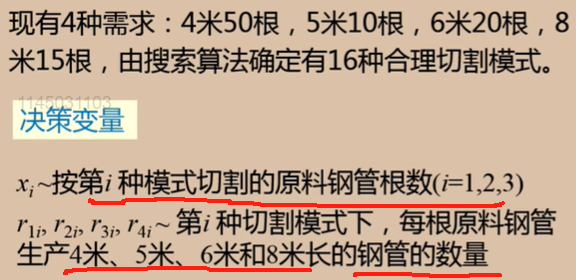

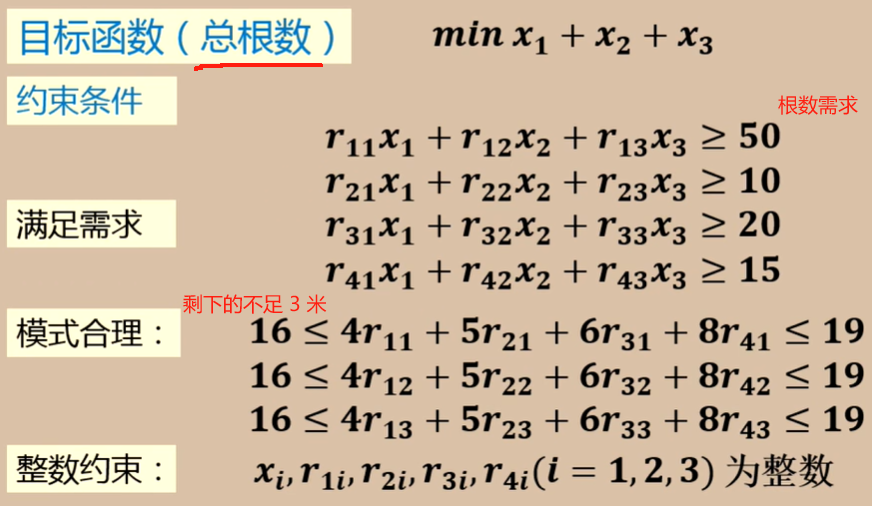

<font color=blue><font size=4>非线性

In [ ]:
"""
scipy.optimize.minimize 求解非线性规划
"""

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#minimize

from scipy.optimize import minimize

# 目标函数：注意写成最小化形式 ！！！
fun = lambda x: x[0] + x[1] + x[2]

# 约束 不等式要求是 ≥ 形式
cons = ({'type': 'ineq', 'fun': lambda x:  x[3] * x[0] +  x[7] * x[1] + x[11] * x[2] - 50},
     {'type': 'ineq', 'fun': lambda x:  x[4] * x[0] +  x[8] * x[1] + x[12] * x[2] - 10},
     {'type': 'ineq', 'fun': lambda x:  x[5] * x[0] +  x[9] * x[1] + x[13] * x[2] - 20},
     {'type': 'ineq', 'fun': lambda x:  x[6] * x[0] +  x[10] * x[1] + x[14] * x[2] - 15},
     {'type': 'ineq', 'fun': lambda x:  4 * x[3] +  5 * x[4] + 6 * x[5] + 8 * x[6] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[3] -  5 * x[4] - 6 * x[5] - 8 * x[6] + 19},
     {'type': 'ineq', 'fun': lambda x:  4 * x[7] +  5 * x[8] + 6 * x[9] + 8 * x[10] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[7] -  5 * x[8] - 6 * x[9] - 8 * x[10] + 19},
     {'type': 'ineq', 'fun': lambda x:  4 * x[11] +  5 * x[12] + 6 * x[13] + 8 * x[14] - 16},
     {'type': 'ineq', 'fun': lambda x:  -4 * x[11] -  5 * x[12] - 6 * x[13] - 8 * x[14] + 19},)

# 边界
# bnds = ((0, None))
x_0 = (10, 50, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2)  #  x 的初始猜测值
# 0 1 0
# 1 0 0
# 1 1 0
# 1 1 2
res = minimize(fun,x_0, method='SLSQP', bounds=[(0, None)]*15, constraints=cons)
# (100, 200, 400) 为对 x 的初始猜测

print("目标的最小值：", res.fun)  # 总根数
print("最优解 x =", [round(xi) for xi in res.x])
print("是否优化成功：", res.message)

目标的最小值： 25.789473684909318
最优解 x = [0, 26, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2]
是否优化成功： Optimization terminated successfully


## 如何处理大型下料问题

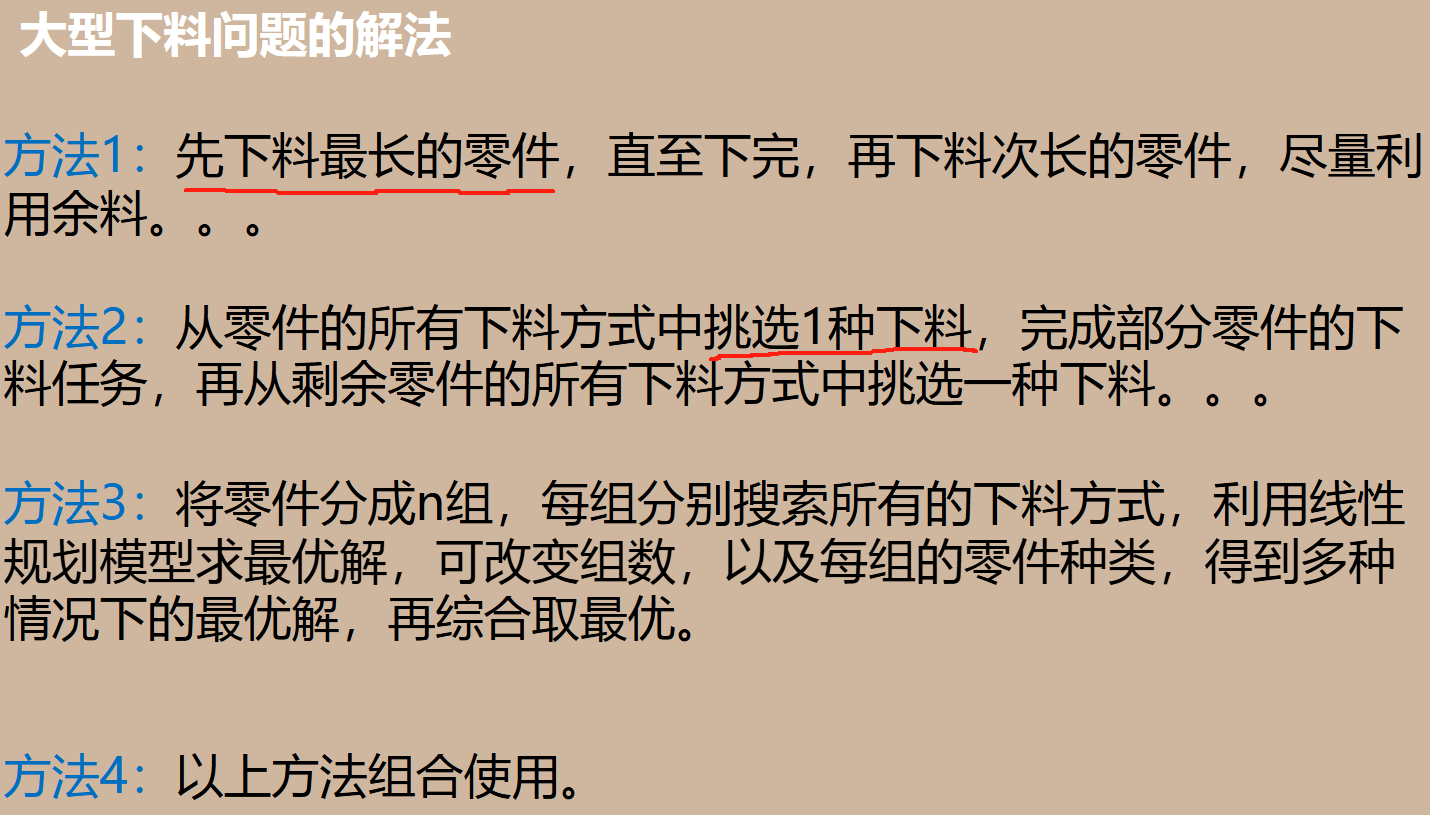